# Ejercicio análisis time series
Para este ejercicio vas a trabajar con el histórico de valores en bolsa de una empresa que se dedica a vender muebles. Se pide
1. Importa los datos 'df_furniture.csv'
2. Trata la fecha como texto. Crea una columna para el año, mes y dia, y a partir de esas columnas crea la de fecha, en formato datetime de pandas
3. ¿De qué fecha a qué fecha va el histórico?
4. ¿Cómo es la serie temporal? ¿Tiene tendencia? ¿Aprecias alguna estacionalidad?
5. ¿Podrías demostrar de dos maneras estadísticas que la serie no es stationary?
6. Parece que hay una tendencia, pero no se aprecia bien con tanto pico en la serie. ¿Conoces algún método para representar mejor la tendencia?
7. Estaría bien visualizar todos los componentes de la serie temporal por separado
8. Demuestra mediante una gráfica de autocorrelación que la serie es estacional
9. ¿Qué dependencia tiene cada instante de sus ultimos 5 lags? Demuéstralo mediante una matriz de correlación. ¿Esto es bueno para los modelos?
10. Ya hemos visto que hay seasonality. ¿Cada cuántos instantes se cumple ese patrón?
11. Para un futuro modelado de los datos necesitaremos eliminar la tendencia. ¿Cómo hacemos esto?

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dateutil.parser import parse 


## 1. Cargamos los datos

Lo mas rapido

In [39]:
df = pd.read_csv(r'C:\Users\mareg\OneDrive\Documentos\TheBridge_Enero\Machine_Learning\3-Time_Series\ejercicios\data\df_furniture.csv', parse_dates=['Month'])

In [40]:
df.head()

,Month,furniture_price_adjusted
0,1992-01-01,2073.432724
1,1992-02-01,2114.485812
2,1992-03-01,2260.570891
3,1992-04-01,2255.103236
4,1992-05-01,2331.414618


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Month                     326 non-null    datetime64[ns]
 1   furniture_price_adjusted  331 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.3 KB


## 2. Tratar la fecha como texto y parsear

Metodo 1

In [31]:
df0 = pd.read_csv(r'C:\Users\mareg\OneDrive\Documentos\TheBridge_Enero\Machine_Learning\3-Time_Series\ejercicios\data\df_furniture.csv')

In [38]:
df0['año'] = df0['Month'].str.extract(r'(\d{4})')
df0['mes'] = df0['Month'].str.extract(r'-(\d{2})-')
df0['dia'] = df0['Month'].str.extract(r'(\d{2})$')

# Crear la columna 'fecha' con los valores de año, mes y día
df0['fecha'] = pd.to_datetime(df0['año'] + df0['mes'] + df0['dia'], format='%Y%m%d')

df0.head()

,Month,furniture_price_adjusted,año,mes,dia,fecha
0,1992-01-01,2073.432724,1992,01,01,1992-01-01
1,1992-02-01,2114.485812,1992,02,01,1992-02-01
2,1992-03-01,2260.570891,1992,03,01,1992-03-01
3,1992-04-01,2255.103236,1992,04,01,1992-04-01
4,1992-05-01,2331.414618,1992,05,01,1992-05-01


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Month                     326 non-null    datetime64[ns]
 1   furniture_price_adjusted  331 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.3 KB


Metodo 2 (más rapido)

In [55]:
df1 = pd.read_csv(r'C:\Users\mareg\OneDrive\Documentos\TheBridge_Enero\Machine_Learning\3-Time_Series\ejercicios\data\df_furniture.csv')

# Tratar la columna de fecha como texto
df1['fecha'] = pd.to_datetime(df1['Month'], format='%Y-%m-%d')

# Crear columnas para el año, mes y día
df1['año'] = df1['fecha'].dt.year
df1['mes'] = df1['fecha'].dt.month
df1['dia'] = df1['fecha'].dt.day


In [56]:
df1.head()

,Month,furniture_price_adjusted,fecha,año,mes,dia
0,1992-01-01,2073.432724,1992-01-01,1992.0,1.0,1.0
1,1992-02-01,2114.485812,1992-02-01,1992.0,2.0,1.0
2,1992-03-01,2260.570891,1992-03-01,1992.0,3.0,1.0
3,1992-04-01,2255.103236,1992-04-01,1992.0,4.0,1.0
4,1992-05-01,2331.414618,1992-05-01,1992.0,5.0,1.0


In [57]:
df1.columns

Index(['Month', 'furniture_price_adjusted', 'fecha', 'año', 'mes', 'dia'], dtype='object')

In [58]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Month                     326 non-null    object        
 1   furniture_price_adjusted  331 non-null    float64       
 2   fecha                     326 non-null    datetime64[ns]
 3   año                       326 non-null    float64       
 4   mes                       326 non-null    float64       
 5   dia                       326 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 15.6+ KB


## 3. ¿De qué fecha a qué fecha va el histórico?

La serie va desde enero de 1992 a julio de 2019

#No lo paso a astype int porque hay nulos y los trato luego.

In [59]:
fecha_min = df1['año'].min()
fecha_max = df1['año'].max()

print("Rango de fechas:")
print("Fecha mínima:", fecha_min)
print("Fecha máxima:", fecha_max)

Rango de fechas:
Fecha mínima: 1992.0
Fecha máxima: 2019.0


In [60]:
pd.isnull(df1).sum()
print(df1.isnull().sum())

Month                       5
furniture_price_adjusted    0
fecha                       5
año                         5
mes                         5
dia                         5
dtype: int64


## 4. ¿Cómo es la serie temporal? ¿Tiene tendencia? ¿Aprecias alguna estacionalidad?

Se ve que tiene una clara tendencia al alza, a pesar de una pequeña bajada en las acciones en el 2007.

También apreciamos estacionalidad, al cumplirse cierto patrón a lo largo del tiempo

In [64]:
df1['Month'] = pd.to_datetime(df1['Month'], format='%Y-%m-%d')

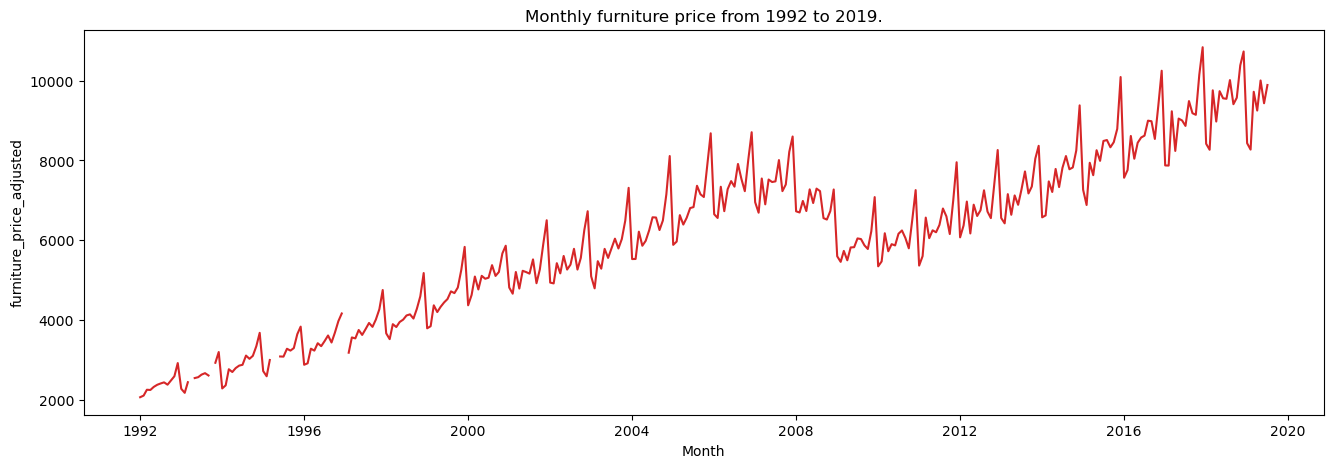

In [65]:
def plot_df(df, x, y, title="", xlabel='Month', ylabel='furniture_price_adjusted', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df1, x=df1['Month'], y=df['furniture_price_adjusted'], title='Monthly furniture price from 1992 to 2019.')

Para enfatizar el crecimiento de los datos creando una gráfica simétrica

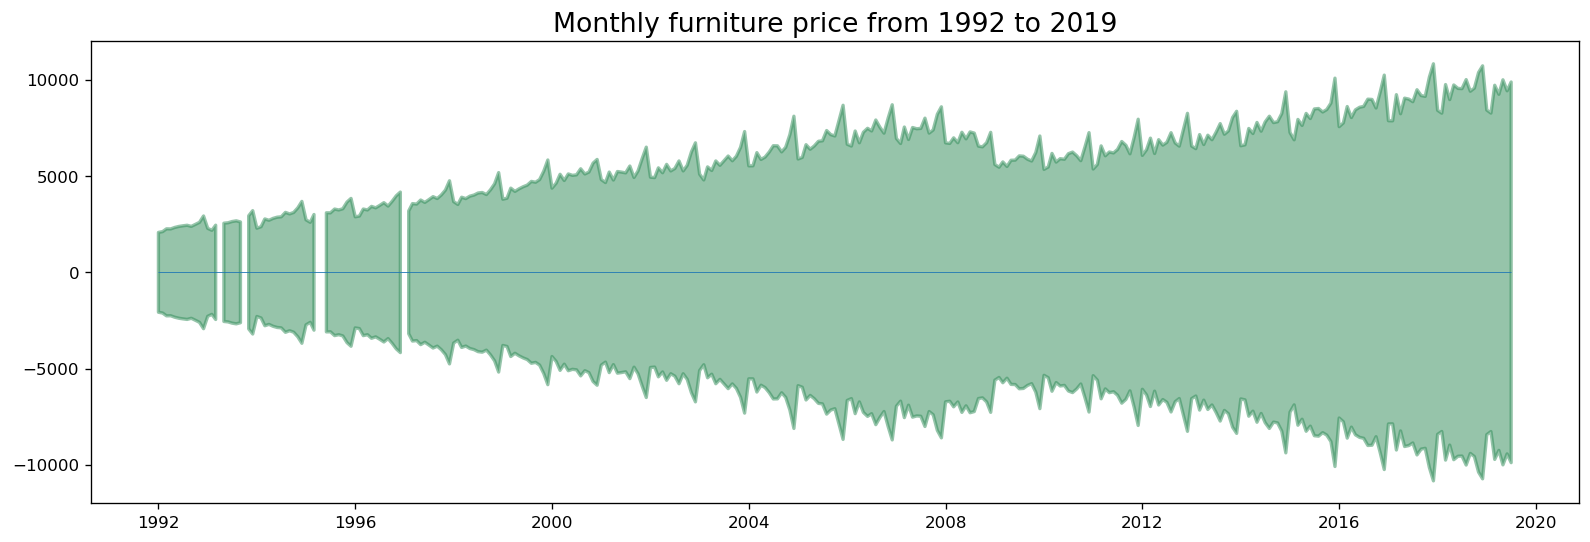

In [66]:
x = df1['Month'].values
y1 = df1['furniture_price_adjusted'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-12000, 12000)
plt.title('Monthly furniture price from 1992 to 2019', fontsize=16)
plt.hlines(y=0, xmin=np.min(df1.Month), xmax=np.max(df1.Month), linewidth=.5)
plt.show()

Asi elimino los nulos 

In [67]:
df1_forward_fill = df1.ffill()


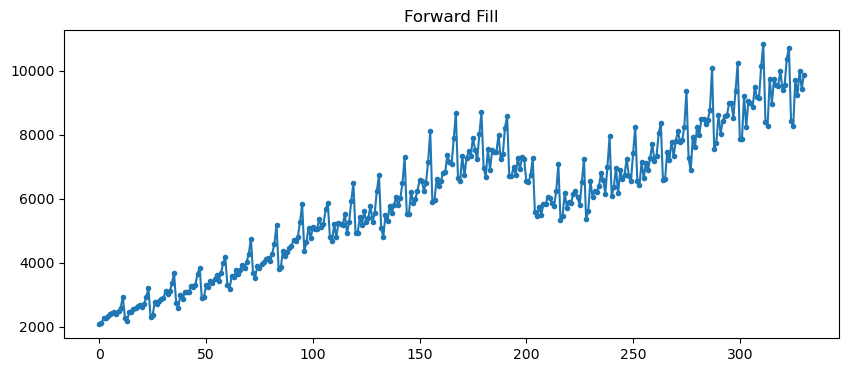

In [68]:
fig, ax = plt.subplots(figsize=(10, 4))
df1_forward_fill['furniture_price_adjusted'].plot(title='Forward Fill', ax=ax, label='Forward Fill', style=".-")
plt.show()

## 5. ¿Podrías demostrar de dos maneras estadísticas que la serie no es stationary?

Lo voy a comprobar con la prueba de Dickey-Fuller aumentada (ADF) primero.

Prueba de Dickey-Fuller Aumentada (ADF): prueba estadística que evalúa si una serie de tiempo tiene raíces unitarias, lo cual indica la presencia de una tendencia no estacionaria. 

In [69]:
df1 = df1_forward_fill

In [70]:
from statsmodels.tsa.stattools import adfuller

# Prueba de Dickey-Fuller Aumentada
result = adfuller(df1['furniture_price_adjusted'])

# Extraer el valor p y compararlo con un umbral para determinar la estacionaridad
p_value = result[1]
alpha = 0.05  

if p_value <= alpha:
    print("La serie es estacionaria.")
else:
    print("La serie no es estacionaria.")

La serie no es estacionaria.


Test KPSS (Kwiatkowski-Phillips-Schmidt-Shin):
El test KPSS se utiliza para probar la hipótesis nula donde la serie de tiempo es estacionaria alrededor de una tendencia determinística. La hipótesis nula del test KPSS :la serie de tiempo es estacionaria (no tiene tendencia) y la hipótesis alternativa: la serie de tiempo tiene una tendencia.

 El valor de la estadística KPSS es mayor que todos los valores críticos, lo que sugiere que la serie de tiempo es no estacionaria en presencia de una tendencia.

In [71]:
from statsmodels.tsa.stattools import kpss

# test KPSS
result = kpss(df1['furniture_price_adjusted'], regression='c')

# Imprimir los resultados
print('KPSS Statistic:', result[0])
print('p-value:', result[1])
print('Lags Used:', result[2])
print('Critical Values:')
for key, value in result[3].items():
    print(f'   {key}: {value}')

KPSS Statistic: 2.555246987562725
p-value: 0.01
Lags Used: 11
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739


c:\Users\mareg\anaconda3\envs\general\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


Test Phillips-Perron (PP Test):
El test Phillips-Perron se utiliza para probar la hipótesis nula de que una serie de tiempo tiene una raíz unitaria (es no estacionaria). La hipótesis alternativa es que la serie de tiempo no tiene una raíz unitaria (es estacionaria).

In [72]:
from statsmodels.tsa.stattools import adfuller

# test Phillips-Perron
result = adfuller(df1['furniture_price_adjusted'], regression='c')

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Lags Used:', result[2])
print('Number of Observations Used:', result[3])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -1.1285507258736933
p-value: 0.7035529748089987
Lags Used: 14
Number of Observations Used: 316
Critical Values:
   1%: -3.4512146067362317
   5%: -2.870730188960711
   10%: -2.5716664849383113


El valor de la estadística ADF es mayor que todos los valores críticos, lo que sugiere que la serie de tiempo es no estacionaria. Además, el valor p es mayor que 0.05, lo que respalda la no estacionariedad de la serie de tiempo.

Descomposición de la serie:

In [73]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Month                     331 non-null    datetime64[ns]
 1   furniture_price_adjusted  331 non-null    float64       
 2   fecha                     331 non-null    datetime64[ns]
 3   año                       331 non-null    float64       
 4   mes                       331 non-null    float64       
 5   dia                       331 non-null    float64       
dtypes: datetime64[ns](2), float64(4)
memory usage: 15.6 KB


## 6. ¿Conoces algún método para representar mejor la tendencia?

In [121]:
#dsmoother_lowest = df['furniture_price_adjusted'].rolling(12).mean()

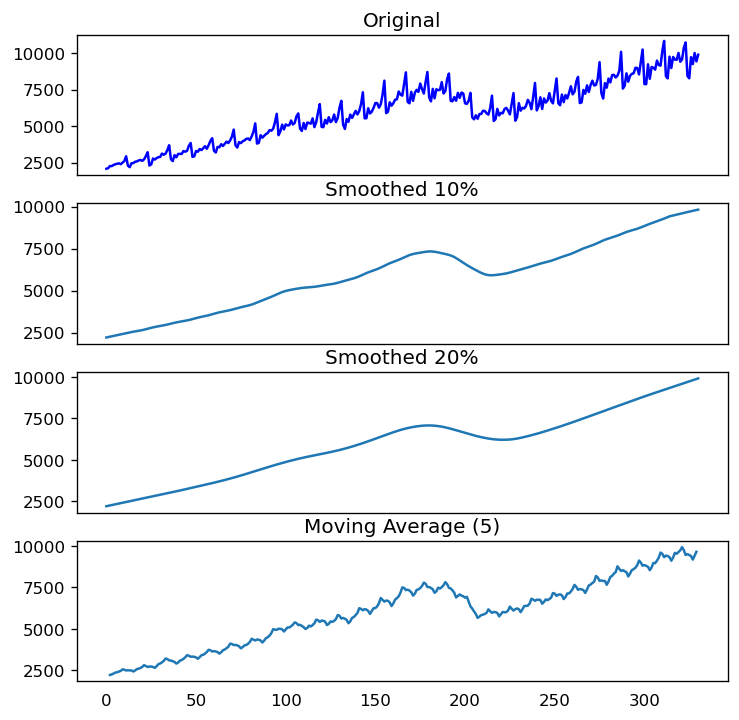

In [74]:
from statsmodels.nonparametric.smoothers_lowess import lowess
plt.rcParams.update({'xtick.bottom' : False, 'axes.titlepad':5})

# 1. Moving Average
df_mav = df1.furniture_price_adjusted.rolling(5, center=True, closed='both').mean()

# 2.Smoothing
df_10 = pd.DataFrame(lowess(df1.furniture_price_adjusted, np.arange(len(df1.furniture_price_adjusted)), frac=0.10)[:, 1], index=df.index, columns=['furniture_price_adjusted'])
df_20 = pd.DataFrame(lowess(df1.furniture_price_adjusted, np.arange(len(df1.furniture_price_adjusted)), frac=0.20)[:, 1], index=df.index, columns=['furniture_price_adjusted'])

fig, axes = plt.subplots(4,1, figsize=(7, 7), sharex=True, dpi=120)
df1['furniture_price_adjusted'].plot(ax=axes[0], color='b', title='Original')
df_10['furniture_price_adjusted'].plot(ax=axes[1], title='Smoothed 10%')
df_20['furniture_price_adjusted'].plot(ax=axes[2], title='Smoothed 20%')
df_mav.plot(ax=axes[3], title='Moving Average (5)')
plt.show()

## 7. Estaría bien visualizar todos los componentes de la serie temporal por separado

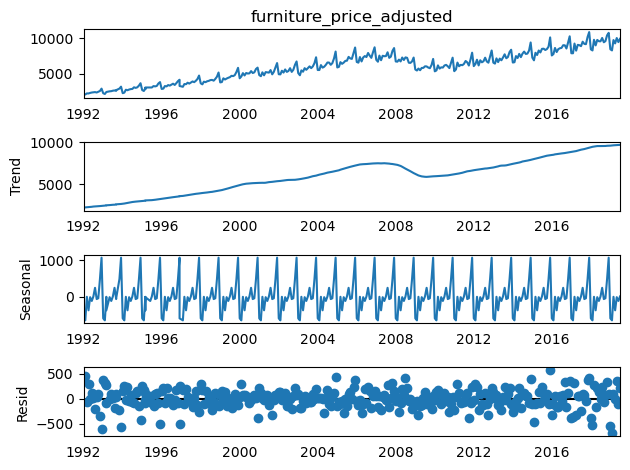

In [76]:
from statsmodels.tsa.seasonal import seasonal_decompose

df1.set_index('Month', inplace=True)
df1.sort_index(inplace=True)

fecha_minima = df1.index.min()
fecha_maxima = df1.index.max()

# Descomposición estacional
result = seasonal_decompose(df1['furniture_price_adjusted'], model='additive', extrapolate_trend='freq', period=12)


result.plot()
plt.show()

In [77]:
# Multiplicative Decomposition 
result_mul = seasonal_decompose(df1['furniture_price_adjusted'], model = 'multiplicative', extrapolate_trend = 'freq', period = 12)


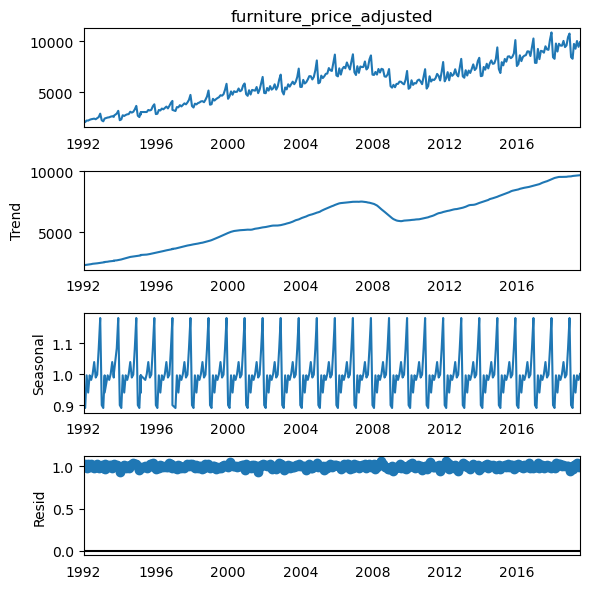

In [78]:
plt.rcParams.update({'figure.figsize': (6,6)})
result_mul.plot();

## 8. Demuestra mediante una gráfica de autocorrelación que la serie es estacional

c:\Users\mareg\anaconda3\envs\general\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


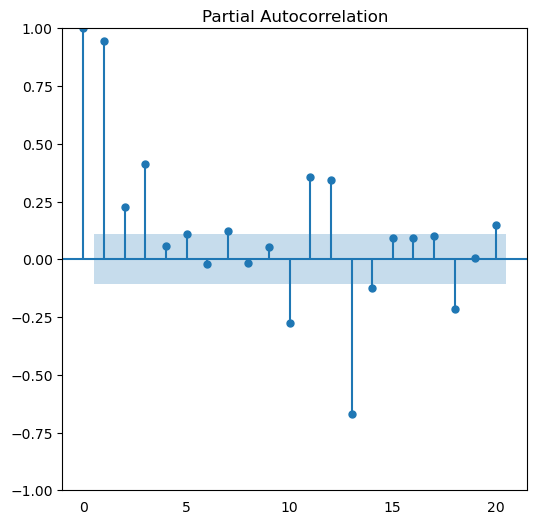

In [79]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df1['furniture_price_adjusted'], lags=20);

In [80]:
from pandas.plotting import autocorrelation_plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

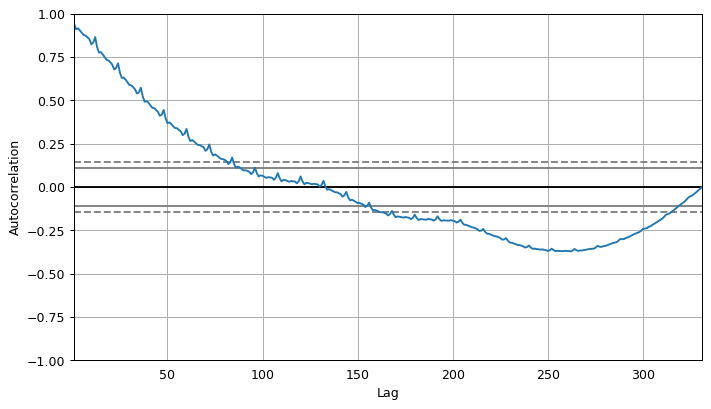

In [81]:
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':90})
autocorrelation_plot(df1.furniture_price_adjusted.tolist())


## 9. ¿Qué dependencia tiene cada instante de sus ultimos 5 lags? Demuestralo mediante una matriz de correlación.

In [82]:
# Calcular los lags
lags = range(1, 6)

for lag in lags:
    df1[f'Lag_{lag}'] = df1['furniture_price_adjusted'].shift(lag)

# Seleccionar las columnas correspondientes a los lags y el instante actual
lag_columns = [f'Lag_{lag}' for lag in lags]
lag_columns.append('furniture_price_adjusted')

#  DataFrame con las columnas seleccionadas
lagged_data = df1[lag_columns]

correlation_matrix = lagged_data.corr()
print(correlation_matrix)

                             Lag_1     Lag_2     Lag_3     Lag_4     Lag_5  \
Lag_1                     1.000000  0.950599  0.927538  0.944637  0.939980   
Lag_2                     0.950599  1.000000  0.950224  0.926949  0.944155   
Lag_3                     0.927538  0.950224  1.000000  0.949927  0.926156   
Lag_4                     0.944637  0.926949  0.949927  1.000000  0.949554   
Lag_5                     0.939980  0.944155  0.926156  0.949554  1.000000   
furniture_price_adjusted  0.951005  0.928338  0.945035  0.940613  0.935901   

                          furniture_price_adjusted  
Lag_1                                     0.951005  
Lag_2                                     0.928338  
Lag_3                                     0.945035  
Lag_4                                     0.940613  
Lag_5                                     0.935901  
furniture_price_adjusted                  1.000000  


## 10. Ya hemos visto que hay seasonality. ¿Cada cuántos instantes se cumple ese patrón?

[]

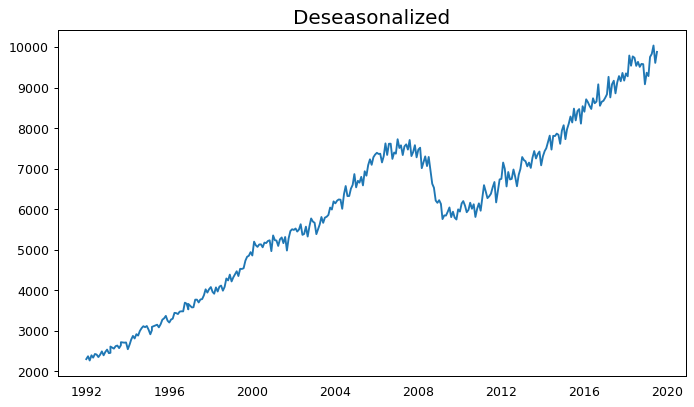

In [83]:
deseasonalized = df1.furniture_price_adjusted.values / result_mul.seasonal

# Plot
plt.plot(deseasonalized)
plt.title('Deseasonalized', fontsize=16)
plt.plot()

Cada doce meses 

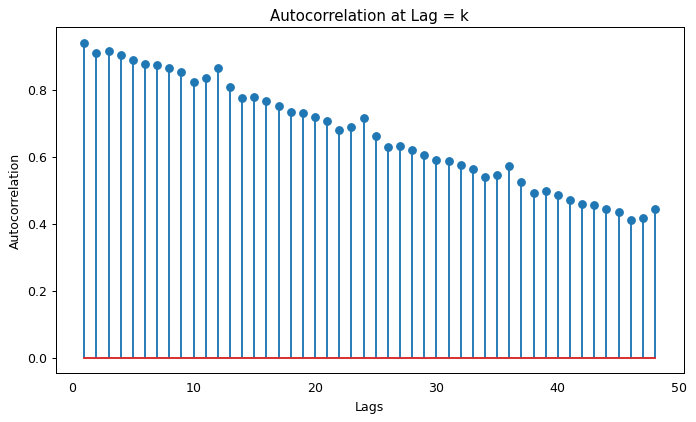

In [84]:
from statsmodels.graphics.tsaplots import acf
import matplotlib.pyplot as plt

# autocorrelación en lags estacionales
lag_acf = acf(df1['furniture_price_adjusted'], nlags=48)

plt.stem(range(1, 49), lag_acf[1:])
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation at Lag = k')
plt.show()

## 11. Para un futuro modelado de los datos necesitaremos eliminar la tendencia. ¿Cómo hacemos esto?

In [85]:
from scipy import signal

Text(0.5, 1.0, 'Furniture prices detrended eliminando tendencia')

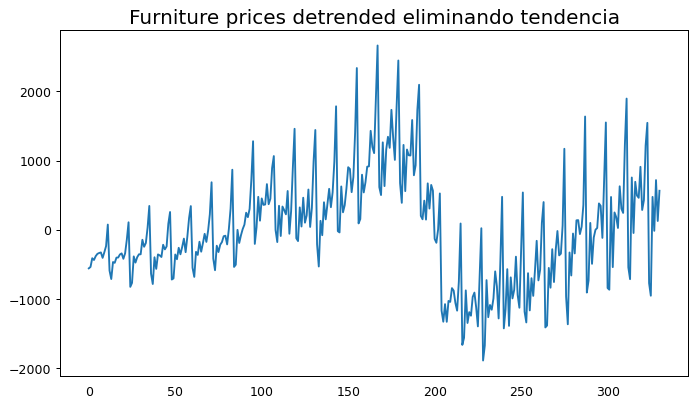

In [86]:
detrended = signal.detrend(df1.furniture_price_adjusted.values)
plt.plot(detrended)
plt.title('Furniture prices detrended eliminando tendencia', fontsize=16)
